Student Name:Chelliah Kanthanathan
Student ID:18263003

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [2]:
a_x = 0.05
a_y= 10

In [3]:
data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.


In [9]:
data.shape

(20, 2)


Data
[[ 0.          3.29858591]
 [ 1.00454644  4.42239898]
 [ 2.03027608  3.25029351]
 [ 3.00625088 16.14932109]
 [ 3.97376343 17.02688084]
 [ 5.1046149  19.66198087]
 [ 5.94292587 22.94038442]
 [ 6.8282177  28.18505266]
 [ 7.97652732 27.52674323]
 [ 8.86309788 35.64122178]
 [ 9.87783684 39.83838098]
 [10.96582195 48.7682326 ]
 [11.95123909 50.27302849]
 [12.85624362 53.30540341]
 [13.73749294 60.91174614]
 [15.30261457 64.27735029]
 [16.3720647  67.81452967]
 [17.14450301 68.05704641]
 [17.83930826 70.92844379]
 [18.60210303 74.31724202]]

Data Shape
(20, 2)

meanof_eachcolumn
[ 9.46897243 38.82971335]

center_column
[[ -9.46897243 -35.53112744]
 [ -8.46442599 -34.40731438]
 [ -7.43869635 -35.57941985]
 [ -6.46272154 -22.68039226]
 [ -5.49520899 -21.80283252]
 [ -4.36435752 -19.16773249]
 [ -3.52604656 -15.88932893]
 [ -2.64075472 -10.64466069]
 [ -1.4924451  -11.30297012]
 [ -0.60587455  -3.18849158]
 [  0.40886442   1.00866763]
 [  1.49684952   9.93851924]
 [  2.48226667  11.443315

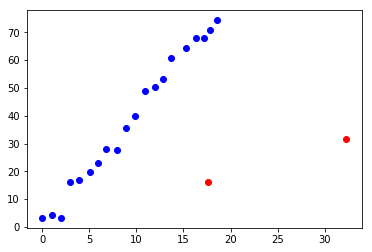


eigen values
[6.20364449e+02 4.04796931e-01]

eigen vectors
[[-0.23568418 -0.9718297 ]
 [ 0.9718297  -0.23568418]]

projected_data using scikitlearn


[[ 36.76189195  -0.828104  ]
 [ 35.43298133  -0.1167209 ]
 [ 36.33031999   1.15636034]
 [ 23.56464005  -0.93525509]
 [ 22.48377403  -0.20182461]
 [ 19.65638175   0.27611905]
 [ 16.27275517   0.31814669]
 [ 10.96718152  -0.05758574]
 [ 11.33630777   1.21352877]
 [  3.24146586   0.16267014]
 [ -1.07661603   0.15961958]
 [-10.01133193  -0.88766894]
 [-11.70598451  -0.28466787]
 [-14.86623177  -0.11984039]
 [-22.46599807  -1.05611078]
 [-26.10566656  -0.32829875]
 [-29.79525501  -0.12263256]
 [-30.21299147   0.57088857]
 [-33.16725533   0.56937801]
 [-36.64036876   0.51199849]]


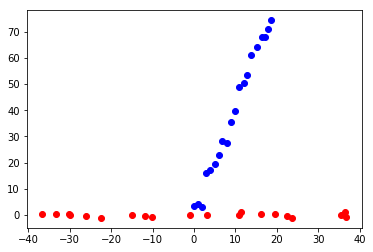


 scikitlearn PCA using number of components 1

Data
[[ 0.          2.61154728]
 [ 1.01351322  6.33363414]
 [ 1.99488956  3.41452595]
 [ 3.02244298 11.07770149]
 [ 4.04250175 19.54753172]
 [ 5.08529375 20.73612554]
 [ 6.08339315 28.5249752 ]
 [ 7.12818732 25.45268663]
 [ 7.81057732 28.9222337 ]
 [ 9.18868378 32.39139948]
 [10.00198386 39.83982391]
 [10.89626123 40.83454669]
 [12.24909064 51.74137381]
 [12.97046386 52.05926058]
 [14.16069578 60.71371008]
 [14.87273543 63.15277582]
 [16.15118422 61.54791961]
 [17.22544594 72.95348353]
 [18.36334342 75.70179786]
 [19.33511351 72.22173581]]

Data Shape
(20, 2)

eigen values
[618.74904453]

eigen vectors
[[0.23885418 0.97105545]]

projected_data using scikitlearn


[[-37.12710997]
 [-33.27067538]
 [-35.87088544]
 [-28.18408167]
 [-19.71576159]
 [-18.31249585]
 [-10.51069076]
 [-13.24449985]
 [ -9.71238557]
 [ -6.01446676]
 [  1.41262649]
 [  2.59215934]
 [ 13.50642218]
 [ 13.98741087]
 [ 22.67565307]
 [ 25.21419478]
 [ 23.96115326]
 [ 35.29

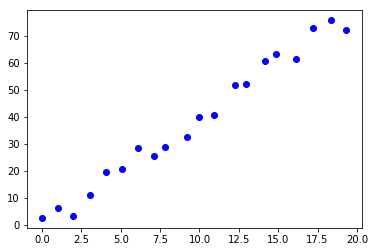


 scikitlearn PCA using number of components 2

Data
[[ 0.         -2.6564055 ]
 [ 0.99187602  3.16516945]
 [ 1.95232881 11.30938848]
 [ 2.93513501 10.3762952 ]
 [ 4.04476446 17.21585891]
 [ 4.9449091  24.83645189]
 [ 6.10895644 25.93388899]
 [ 6.90694303 23.77466435]
 [ 8.06675956 29.82077127]
 [ 8.88988603 33.85210905]
 [10.14673612 41.0438247 ]
 [11.04420202 44.49365122]
 [11.81101962 50.79660098]
 [13.27333221 52.65921755]
 [14.00877292 54.20284856]
 [14.85213711 60.9210368 ]
 [16.17066487 60.8497159 ]
 [17.06506134 65.8797793 ]
 [17.58707547 70.54653598]
 [19.03212423 71.37842788]]

Data Shape
(20, 2)

eigen values
[5.64265539e+02 3.95089373e-01]

eigen vectors
[[-0.24739209 -0.96891545]
 [-0.96891545  0.24739209]]

projected_data using scikitlearn


[[ 41.27568715  -0.74273167]
 [ 35.38969094  -0.2635641 ]
 [ 27.26102285   0.82065371]
 [ 27.92197287  -0.3624423 ]
 [ 21.02050035   0.25447452]
 [ 13.41410139   1.26758487]
 [ 12.06280152   0.41121867]
 [ 13.95749208  -0.89613795]
 [

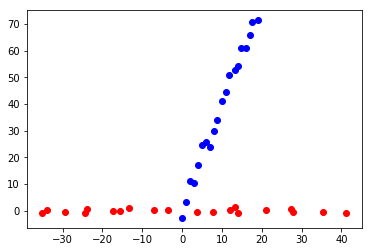

In [15]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA
    
def populate_data():
    a_x = 0.05
    a_y= 10
    data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+a_y*(rand.random()-0.5)] for n in range(20)])
    print ("\nData")
    print (data)
    print ("\nData Shape")
    print (data.shape)
    return data

class PrincipalComponentAnalysis():
    
    def __init__(self,number_of_components):
        self.no_of_components = number_of_components
        self.data = populate_data()

    def myfit(self):
        # calculate mean of each column
        self.meanof_eachcolumn = np.mean(self.data.T,axis=1)
        print ("\nmeanof_eachcolumn")
        print (self.meanof_eachcolumn)
        
        # center column by subtracting column means
        self.center_column = self.data - self.meanof_eachcolumn
        print ("\ncenter_column")
        print (self.center_column)
        
        # calculate covariance matrix
        self.covar_matrix = np.cov(self.center_column.T)
        print ("\ncovar_matrix")
        print (self.covar_matrix)
    
        # calculate eigen vectors and eigen values
        eigen_values, eig_vector_matrix = eig(self.covar_matrix)        
        sorted_eigen_values_indexes = eigen_values.argsort()[::-1]
        sorted_eigen_values = eigen_values[sorted_eigen_values_indexes]
        sorted_eigen_vectors = eig_vector_matrix[sorted_eigen_values_indexes] 
        self.eigen_values = sorted_eigen_values[:self.no_of_components]
        self.eig_vector_matrix = sorted_eigen_vectors.T[:,:self.no_of_components] 
        
        print ("\neigen_values")
        print (self.eigen_values)
        print ("\neigen_vectors")
        print (self.eig_vector_matrix)
        self.transform()
    
    def transform(self):
        # project Data
        self.projected_data = self.eig_vector_matrix.T.dot(self.center_column.T)
        print ("\nprojected_data using numpy")
        print (self.projected_data.T)
        
        plt.plot(self.data[:,0],self.data[:,1],'bo')
        if (self.no_of_components == 2):
            plt.plot(self.projected_data[:,0],self.projected_data[:,1],'or')
        plt.show()
        return self.projected_data
        
    def compare_dataset(self):
        pca = PCA(n_components=1)
        pca.fit(self.data)
        data_pca = pca.transform(self.data)
        data_reduced = pca.inverse_transform(data_pca)

        plt.plot(self.data[:,0], self.data[:,1], 'bo')
        plt.plot(data_reduced[:,0], data_reduced[:,1],'xr')
        plt.show()

    def scikitfit(self):
        # create the PCA instance
        pca = PCA(self.no_of_components)
        # fit on data
        pca.fit(self.data)
        # access values and vectors
        print ("\neigen values")
        print(pca.explained_variance_)
        print ("\neigen vectors")
        print(pca.components_)
        # transform data
        print ("\nprojected_data using scikitlearn")
        self.pca_data = pca.transform(self.data)
        print ("\n")
        print(self.pca_data)
        
        # plot data    
        plt.plot(self.data[:,0],self.data[:,1],'bo')
        if (self.no_of_components == 2):
            plt.plot(self.pca_data[:,0],self.pca_data[:,1],'or')
        plt.show()



# Compare PCA output between numpy fit and scikitlearn fit
pca = PrincipalComponentAnalysis(2)
pca.myfit()
pca.scikitfit()
    
# Use scikitlearn and compare the difference between number of components 1 and 2
print ("\n scikitlearn PCA using number of components 1")
pca1 = PrincipalComponentAnalysis(1)
pca1.scikitfit()
print ("\n scikitlearn PCA using number of components 2")
pca2 = PrincipalComponentAnalysis(2)
pca2.scikitfit()

Task 1:
Create a 'fit' method that calculates the eigen vectors and eigen values of your dataset. Compare your results to the output of Scikitlearn's fit method and document your findings as a comment (use markdown) directly under the cell with your PCA class.

Eigen Values and Vectors using numpy Fit:
eigen_values
[6.29981094e+02 4.37374698e-01]

eigen_vectors
[[ 0.23673638 -0.97157392]
 [-0.97157392 -0.23673638]]
 
 Eigen Values and Vectors using Scikit's Fit:
 eigen values
[6.29981094e+02 4.37374698e-01]

eigen vectors
[[ 0.23673638  0.97157392]
 [-0.97157392  0.23673638]]
 
FINDINGS: The Eigen values are matching on both the approach, But the Eigen vectors signs are different i.e. with numpy approach the vectors Y co-ordinate has negative value.
 
Task 2:
Use the Scikitlean's PCA class with n_components=2 and n_components=1 and observe the differences. In the cell directly below, comment on what you have observed.

scikitlearn PCA using number of components 1

eigen values
[626.68823809]

eigen vectors
[[0.23326142 0.97241406]]

projected_data using scikitlearn

[[-36.09342138]
 [-34.74857737]
 [-28.98286073]
 [-30.45695976]
 [-24.81242357]
 [-19.93515312]
 [-15.91773115]
 [ -9.02812916]
 [ -7.04511042]
 [ -3.65274945]
 [ -0.54519867]
 [  6.77510073]
 [ 10.80888979]
 [ 14.03040292]
 [ 15.99472335]
 [ 23.06312846]
 [ 31.9068002 ]
 [ 27.76539947]
 [ 38.04468145]
 [ 42.82918841]]

scikitlearn PCA using number of components 2

eigen values
[5.73510299e+02 4.43562307e-01]

eigen vectors
[[-0.24355117 -0.96988805]
 [-0.96988805  0.24355117]]

projected_data using scikitlearn

[[ 37.61474824   0.33528781]
 [ 31.71671418   0.79467215]
 [ 35.22887403  -1.09743652]
 [ 28.34402769  -0.4688542 ]
 [ 21.72442795   0.12953837]
 [ 13.85022092   1.20302904]
 [ 15.2542125   -0.31553262]
 [ 11.1752125   -0.28951055]
 [  2.15368535   0.919185  ]
 [ -0.78250631   0.61322354]
 [  0.32733311  -0.43789059]
 [ -4.85359971  -0.60813743]
 [ -8.68894394  -0.62042066]
 [-12.69620025  -0.257114  ]
 [-16.41749686  -0.23545137]
 [-20.7066098   -0.47052575]
 [-31.03523808   1.06939097]
 [-33.94203532   0.67792529]
 [-33.52873956  -0.30414575]
 [-34.73808662  -0.63723273]]

FINDINGS: n_components represent number of components to keep, With n_components as 1 the feature or variable is 1 hence the output of projected data in to new sub space is one dimension so it could be single line, where as with n_componets as 2 the feature or variable is 2 hence the output of projected space is two dimensions so it could be flat surface


Data
[[ 0.         -2.24693213]
 [ 0.97885183  5.65538081]
 [ 1.97044312  9.67097612]
 [ 3.04325365  8.47453921]
 [ 4.09999002 20.72227942]
 [ 4.88940208 24.95458147]
 [ 5.96544036 21.3525722 ]
 [ 6.94994092 23.39244622]
 [ 8.19303974 35.44789522]
 [ 8.94605002 36.66188928]
 [ 9.89668249 42.54793292]
 [11.0324134  43.87468205]
 [12.01140996 47.06806559]
 [13.0518175  55.36826207]
 [13.72715768 59.18360997]
 [15.25639019 63.09463669]
 [16.23402835 64.20931434]
 [17.2118667  68.92401697]
 [17.72232147 76.67345134]
 [18.58532998 79.52530668]]

Data Shape
(20, 2)

eigen values
[647.89897838]

eigen vectors
[[-0.23015756 -0.97315338]]

projected_data using scikitlearn


[[ 42.54502449]
 [ 34.62957181]
 [ 30.49355943]
 [ 31.4109606 ]
 [ 19.24881497]
 [ 14.94844678]
 [ 18.20609593]
 [ 15.99439538]
 [  3.97648588]
 [  2.62177244]
 [ -3.32504606]
 [ -4.87757351]
 [ -8.21054895]
 [-16.52737086]
 [-20.3957242 ]
 [-24.55371749]
 [-25.86348063]
 [-30.67666631]
 [-38.33553956]
 [-41.30946015]]


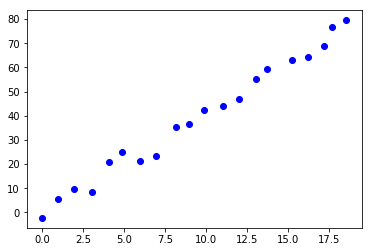

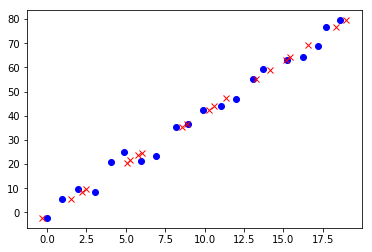

In [16]:
# compare the dataset resulting from transform method with the original dataset
pca3 = PrincipalComponentAnalysis(1)
pca3.scikitfit()
pca3.compare_dataset()

FINDINGS: By comparing the transformed data with original data it is obvious that the dimension reduction to single feature result in single eigen vector that represent single line that passes close to original data.